<a href="https://colab.research.google.com/github/aman5898/Data-Science-December/blob/main/22-01-10-Classification_MNIST/ClassWork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Getting The Data

In [2]:
from sklearn.datasets import fetch_openml

In [5]:
mnist = fetch_openml('mnist_784', version = 1)

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,147.0,252.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [10]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [12]:
X = mnist.data.values
X.shape

(70000, 784)

In [15]:
y = np.array(mnist.target)
y.shape

(70000,)

In [19]:
X[0].ndim, X[0].shape

(1, (784,))

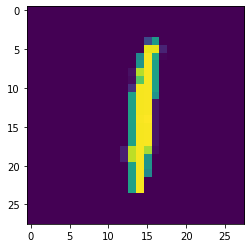

1


In [25]:
plt.imshow(X[112].reshape(28, 28))
plt.show()

print(y[112])

**Convert this to black and white by passing cmap**

In [27]:
y = y.astype('int8')
type(y)

numpy.ndarray

In [30]:
y_5 = y == 5

In [31]:
from sklearn.model_selection import train_test_split

xtrain, xval, ytrain, yval = train_test_split(X, y_5)

In [32]:
xtrain.shape, xval.shape, ytrain.shape, yval.shape

((52500, 784), (17500, 784), (52500,), (17500,))

# Select and train Model

In [33]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()

In [34]:
sgd.fit(xtrain, ytrain)

SGDClassifier()

In [35]:
y_pred = sgd.predict(xval)

In [36]:
y_pred

array([False, False, False, ..., False, False,  True])

In [37]:
yval

array([False, False, False, ..., False, False,  True])

In [49]:
(y_pred == yval).sum() / yval.size

0.9298857142857143

In [50]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, yval)

0.9298857142857143

In [51]:
xtrain, xval, ytrain, yval = train_test_split(X, y<5)

In [52]:
sgd.fit(xtrain, ytrain)

SGDClassifier()

In [53]:
y_pred = sgd.predict(xval)
accuracy_score(y_pred, yval)

0.8333142857142857

In [56]:
from sklearn.model_selection import train_test_split

xtrain, xval, ytrain, yval = train_test_split(X, y_5)

sgd.fit(xtrain, ytrain)
y_pred = sgd.predict(xval)

# Confusion Matrix

In [57]:
from sklearn import metrics

metrics.confusion_matrix(y_pred, yval)

array([[15869,   837],
       [   50,   744]])

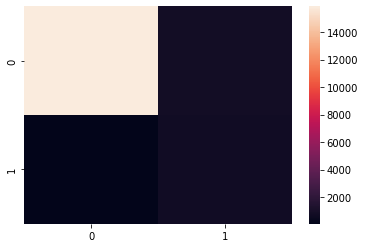

In [103]:
import seaborn as sns

sns.heatmap(metrics.confusion_matrix(y_pred, yval))

In [58]:
metrics.precision_score(y_pred, yval)

0.47058823529411764

In [59]:
metrics.recall_score(y_pred, yval)

0.9370277078085643

In [61]:
metrics.f1_score(y_pred, yval)

0.6265263157894736

# Precision/Recall Tradeoff


![Screenshot_20220103_131814.png](https://raw.githubusercontent.com/aman5898/Pepcoding-Data-Science/main/Ch03_Classification/assets/Screenshot_20220103_131814.png)

In [64]:
y_score = sgd.decision_function(xval)  # return score

In [67]:
y_score

array([-15501.88036951,  -9592.93208668,  -7599.52538512, ...,
       -18892.47570806, -49112.12209669, -21270.7454372 ])

In [66]:
y_score.min(), y_score.max()

(-63985.05835130648, 12518.269012626095)

In [70]:
precisions, recalls, thresholds = metrics.precision_recall_curve(yval, y_score)

In [81]:
t = 5698

print(metrics.precision_score(y_score >= t, yval))
print(metrics.recall_score(y_score >= t, yval))

0.0196078431372549
0.9393939393939394


In [71]:
precisions.shape, recalls.shape, thresholds.shape

((17480,), (17480,), (17479,))

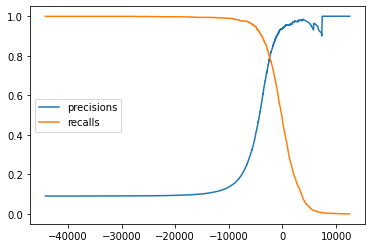

In [75]:
plt.plot(thresholds, precisions[1:], label = 'precisions')
plt.plot(thresholds, recalls[1:], label = 'recalls')

plt.legend()
plt.show()

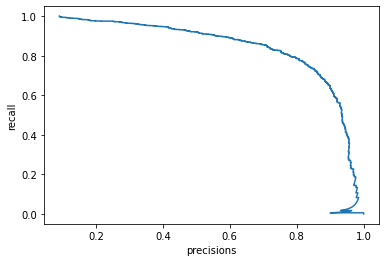

In [84]:
plt.plot(precisions, recalls, label = 'recalls')

plt.xlabel('precisions')
plt.ylabel('recall')
plt.show()

# ROC

Receiver Operating Characteristic curve

In [85]:
fpr, tpr, threshold = metrics.roc_curve(yval, y_score)

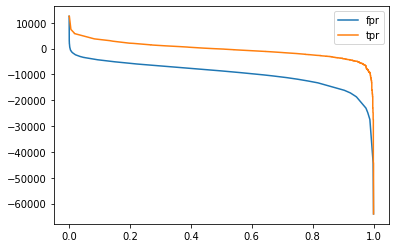

In [87]:
plt.plot(fpr, threshold, label = 'fpr')
plt.plot(tpr, threshold, label = 'tpr')

plt.legend()

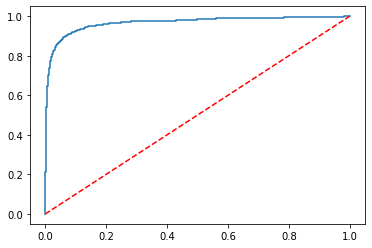

In [89]:
plt.plot(fpr, tpr, label = 'auc')
plt.plot([0, 1], [0, 1], '--r')

In [90]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

In [91]:
forest.fit(xtrain, ytrain)

RandomForestClassifier()

In [93]:
y_score_forest = forest.predict_proba(xval)  # return score

In [97]:
y_score

array([-15501.88036951,  -9592.93208668,  -7599.52538512, ...,
       -18892.47570806, -49112.12209669, -21270.7454372 ])

In [99]:
y_score_forest = y_score_forest[:, 1]
y_score_forest

array([0.03, 0.  , 0.04, ..., 0.07, 0.01, 0.  ])

In [100]:
fpr_f, tpr_f, threshold_f = metrics.roc_curve(yval, y_score_forest)

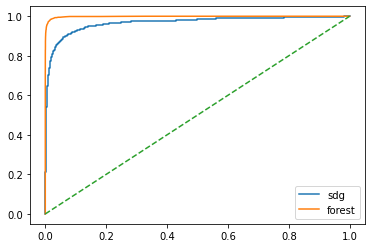

In [102]:
plt.plot(fpr, tpr, label = 'sdg')
plt.plot(fpr_f, tpr_f, label = 'forest')
plt.plot([0, 1], [0, 1], '--')
plt.legend()

# MultiClassClassifier